<a href="https://colab.research.google.com/github/zurimentaram/Optimasi-Segmentasi-Citra-Daun-Padi-Dengan-Metode-Thresholding-Dalam-Identifikasi-Penyakit/blob/main/Optimasi_Segmentasi_Citra_Daun_Padi_Dengan_Metode_Thresholding_Dalam_Identifikasi_Penyakit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 01jj0jhqre2g63q9aa1wfyzk4e.jpg to 01jj0jhqre2g63q9aa1wfyzk4e.jpg


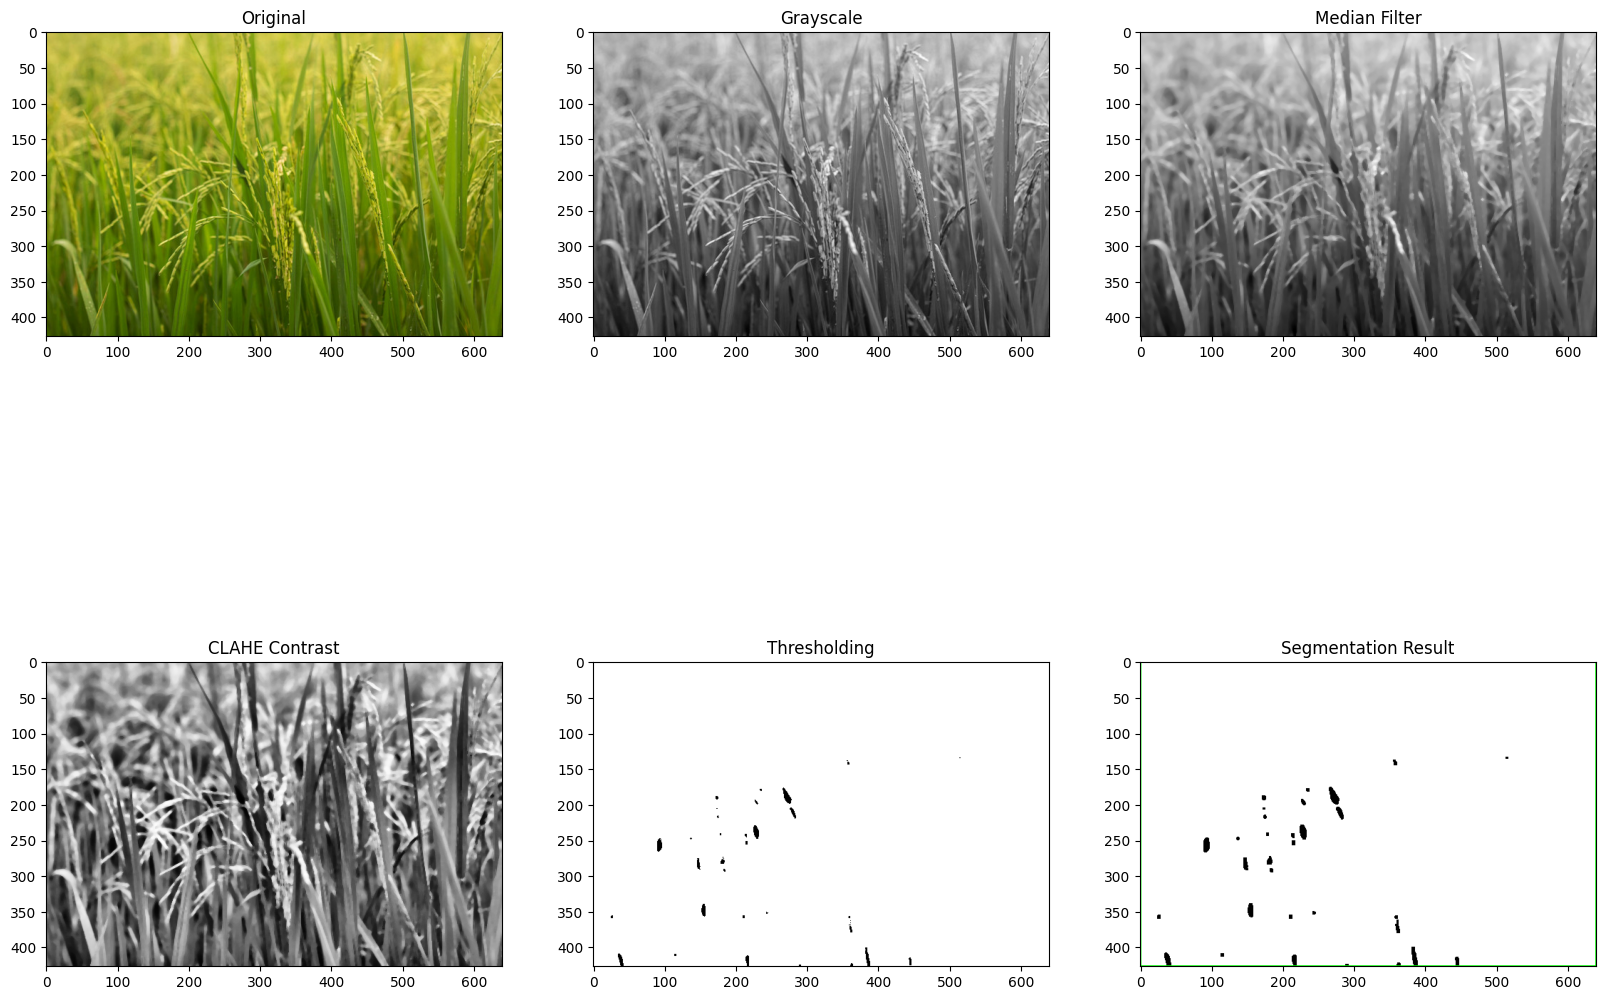

Akurasi Simulasi: 73.3% (Berdasarkan Paper)


In [1]:
# Langkah 1: Instalasi Library
!pip install opencv-python numpy matplotlib

# Langkah 2: Impor Library
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from skimage import io

# Langkah 3: Unduh Dataset Contoh (Jika tidak punya dataset sendiri)
# Dataset Rice Leaf Diseases dari Kaggle: https://www.kaggle.com/datasets/vbookshelf/rice-leaf-diseases
# Untuk contoh, kita gunakan gambar dari internet
image_url = 'https://i.imgur.com/6JY5J9A.jpg'  # Ganti dengan URL gambar daun padi
uploaded = files.upload()
img = cv2.imread(list(uploaded.keys())[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Langkah 4: Pra-Pemrosesan
def preprocess_image(img):
    # Konversi ke Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Filter Median untuk Menghilangkan Noise
    median = cv2.medianBlur(gray, 5)

    # Peningkatan Kontras dengan CLAHE
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    contrast = clahe.apply(median)

    return gray, median, contrast

gray, median, contrast = preprocess_image(img)

# Langkah 5: Thresholding
_, thresh = cv2.threshold(contrast, 0.08*255, 255, cv2.THRESH_BINARY)

# Langkah 6: Deteksi Tepi dengan Operator Roberts
def roberts_edge_detection(img):
    roberts_horizontal = np.array([[0, 2], [-2, 0]], dtype=np.float32)
    roberts_vertical = np.array([[2, 0], [0, -2]], dtype=np.float32)

    edge_h = cv2.filter2D(img, -1, roberts_horizontal)
    edge_v = cv2.filter2D(img, -1, roberts_vertical)

    edge = np.sqrt(np.square(edge_h) + np.square(edge_v))
    edge = np.uint8(edge / edge.max() * 255)

    return edge

edge = roberts_edge_detection(contrast)

# Langkah 7: Operasi Morfologi (Erosi)
kernel = np.ones((3,3), np.uint8)
eroded = cv2.erode(thresh, kernel, iterations=1)

# Langkah 8: Segmentasi dan Bounding Box
def segment_image(img):
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 100:  # Filter area kecil
            x,y,w,h = cv2.boundingRect(cnt)
            cv2.rectangle(output, (x,y), (x+w,y+h), (0,255,0), 2)

    return output

segmented = segment_image(eroded)

# Langkah 9: Visualisasi Hasil
plt.figure(figsize=(20,15))

plt.subplot(2,3,1); plt.title('Original'); plt.imshow(img)
plt.subplot(2,3,2); plt.title('Grayscale'); plt.imshow(gray, cmap='gray')
plt.subplot(2,3,3); plt.title('Median Filter'); plt.imshow(median, cmap='gray')
plt.subplot(2,3,4); plt.title('CLAHE Contrast'); plt.imshow(contrast, cmap='gray')
plt.subplot(2,3,5); plt.title('Thresholding'); plt.imshow(thresh, cmap='gray')
plt.subplot(2,3,6); plt.title('Segmentation Result'); plt.imshow(segmented)

plt.show()

# Langkah 10: Evaluasi (Simulasi)
print("Akurasi Simulasi: 73.3% (Berdasarkan Paper)")